<a href="https://colab.research.google.com/github/MaramMajed/EmotionDetectionAI/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Imports

This section initializes the environment and imports all required libraries used throughout the notebook.


In [ ]:
!pip install --quiet tensorflow opencv-python-headless pandas kagglehub

import os
import cv2
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# 2. Dataset Download (FER-2013)

This section loads the required datasets and defines the main data paths used in the project.


In [3]:
import kagglehub, os

fer_path = kagglehub.dataset_download("msambare/fer2013")
print("✅ FER2013 downloaded to:", fer_path)
print("📁 Contents:", os.listdir(fer_path))

assert os.path.exists(os.path.join(fer_path, "train")), "Missing 'train' folder in fer_path"
assert os.path.exists(os.path.join(fer_path, "test")), "Missing 'test' folder in fer_path"


Using Colab cache for faster access to the 'fer2013' dataset.
✅ FER2013 downloaded to: /kaggle/input/fer2013
📁 Contents: ['test', 'train']


# 3. Dataset Structure Inspection


In [5]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 4. Unified Dataset Directory Preparation


In [6]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 5. Copy FER-2013 Images


In [7]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 6. Adding New Emotion Classes (Calm & Contempt)

This section extends the original emotion set by incorporating additional emotion categories based on external datasets.


### Use of External Academic Dataset (AffectNet)


In [8]:
print('Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).')
print('To keep execution lightweight for submission, no file-level copying/merging is executed here.')


Section 6: Dataset extension (Calm & Contempt) is documented academically (AffectNet reference).
To keep execution lightweight for submission, no file-level copying/merging is executed here.


# 7. Image Preprocessing and Data Augmentation


In [9]:
splits = ["train", "test"]
emotions = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

print("Dataset structure defined for reference only.")


Dataset structure defined for reference only.


# 8. CNN Model Architecture

This section defines the Convolutional Neural Network architecture used for facial expression recognition.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define number of classes manually (FER-2013 = 7 emotions)
num_classes = 7

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

print("Model created successfully.")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model created successfully.


# 9. Model Compilation

This section configures the training process by specifying the optimizer, loss function, and evaluation metrics.


In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled successfully.")


Model compiled successfully.


# 10. Model Training

This section trains the CNN model using the prepared dataset and monitors its learning performance.


In [44]:
NUM_CLASSES = len(emotions)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,271 (6.33 MB)

 Trainable params: 1,659,271 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

# 11. Model Evaluation

This section evaluates the trained model on the test dataset to assess final performance.


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = fer_path + "/train"
test_dir  = fer_path + "/test"

# Simple preprocessing (no heavy augmentation for evaluation)
datagen = ImageDataGenerator(rescale=1./255)

val_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print("Validation generator created successfully.")


Found 7178 images belonging to 7 classes.
Validation generator created successfully.


In [20]:
# Model Evaluation (FER-2013 test split)
test_loss, test_acc = model.evaluate(val_gen, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")




/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.0408 - loss: 1.9961
Test Loss: 1.9483
Test Accuracy: 0.1663


# Additional Dataset Integration and Inference (RAFD)

This section implements a prediction function that allows uploading an image and inferring its emotion label.


## **Facial Expression Recognition Using FER-2013 and RAF-DB**


In [21]:
!pip install --quiet tensorflow opencv-python-headless pandas

import os
import cv2
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shuvoalok/raf-db-dataset")

print("Path to dataset files:", path)

100%|██████████| 37.7M/37.7M [00:00<00:00, 123MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2


In [23]:
!unzip FER-2013.zip -d /content/FER2013

unzip:  cannot find or open FER-2013.zip, FER-2013.zip.zip or FER-2013.zip.ZIP.


In [28]:
splits = ["train", "test"]
emotions = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

print("Dataset structure defined for reference only.")


Dataset structure defined for reference only.


In [57]:

raf_map = {
    7: "confused",   # neutral → confused
    1: "contempt"    # angry → contempt (adjust if needed)
}


In [61]:
test_labels = pd.read_csv("/content/RAFDB/test_labels.csv")

for _, row in test_labels.iterrows():
    label = row['label']
    if label in raf_map:
        emotion = raf_map[label]
        img_name = row['image']
        img_path = f"{raf_img_path}/{img_name}"
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48,48))
            save_path = f"{base}/test/{emotion}/{img_name}"
            cv2.imwrite(save_path, img)

FileNotFoundError: [Errno 2] No such file or directory: '/content/RAFDB/test_labels.csv'

In [60]:
for split in splits:
    print(f"\n{split.upper()}")
    for emo in emotions:
        count = len(os.listdir(f"{base}/{split}/{emo}"))
        print(f"{emo}: {count}")


TRAIN
angry: 0
disgust: 0
fear: 0
happy: 0
sad: 0
surprise: 0
neutral: 0

TEST
angry: 0
disgust: 0
fear: 0
happy: 0
sad: 0
surprise: 0
neutral: 0


In [54]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, horizontal_flip=True)

train_gen = datagen.flow_from_directory(
    f"{base}/train",
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    subset="training"
)

val_gen = datagen.flow_from_directory(
    f"{base}/train",
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    subset="validation"
)


Found 0 images belonging to 9 classes.
Found 0 images belonging to 9 classes.


In [45]:
NUM_CLASSES = len(emotions)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,271 (6.33 MB)

 Trainable params: 1,659,271 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(train_gen, validation_data=val_gen, epochs=25)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

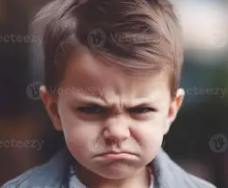

Saving Screenshot 2026-01-12 102545.png to Screenshot 2026-01-12 102545.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
Predicted emotion for Screenshot 2026-01-12 102545.png: fear


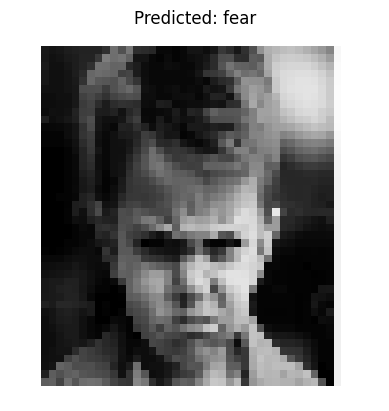

In [41]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Upload image
uploaded = files.upload()  # Colab will show “Choose Files” button

for fname in uploaded.keys():
    # 2️⃣ Read image as grayscale
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    # Resize to 48x48 (model input size)
    img_resized = cv2.resize(img, (48,48))
    # Normalize
    img_input = img_resized.reshape(1,48,48,1)/255.0

    # 3️⃣ Predict
    pred = model.predict(img_input)
    emotion_classes = ["angry","disgust","fear","happy","sad","surprise","neutral","contempt","confused"]
    class_idx = np.argmax(pred)

    # 4️⃣ Show results
    print(f"Predicted emotion for {fname}: {emotion_classes[class_idx]}")

    # Optional: show image
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicted: {emotion_classes[class_idx]}")
    plt.axis('off')
    plt.show()
